0:  |F(x)| = 40.1231; step 1
1:  |F(x)| = 16.8208; step 1
2:  |F(x)| = 5.6912; step 1
3:  |F(x)| = 1.40876; step 1
4:  |F(x)| = 0.038521; step 1
5:  |F(x)| = 0.00171562; step 1
6:  |F(x)| = 0.000132127; step 1
7:  |F(x)| = 6.27737e-06; step 1
8:  |F(x)| = 4.48006e-07; step 1
Residual: 4.48006e-07


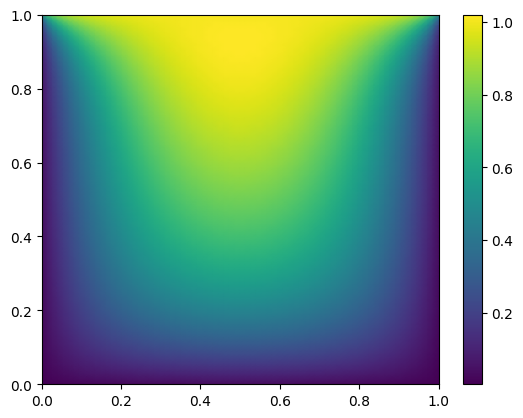

In [5]:
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
   d2x = zeros_like(P)
   d2y = zeros_like(P)

   d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
   d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
   d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

   d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
   d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
   d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

   return d2x + d2y + 5*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = root(residual, guess, method='krylov', options={'disp': True})
#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})
print('Residual: %g' % abs(residual(sol.x)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolormesh(x, y, sol.x, shading='gouraud')
plt.colorbar()
plt.show()